Libraries and Dependencies


In [1]:
import os
import pandas as pd
from collections import Counter

# Language libraries

import nltk
import string
from nltk.corpus import stopwords
import spacy

# Visualization

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

## Variable Initialization


In [3]:
# nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

Variabes

In [4]:
df = pd.read_csv("C:\MLAI\Datasets\shakespeare_plays.csv.zip")

## Analysis Goals

1. Details on characters and their influence in the story.

2. A gender analysis of the story and possibly bechdel test.
    a. Screentime based on gender.
    b. Interaction dynamics between male and female.

3. Pairing of character based on conversation occured.
4. Most used words for each character

## All's well That Ends Well

In [5]:
attew = df[df.play_name == "All's Well That Ends Well"]

In [6]:
char_count = {}

for idx,i in enumerate(attew['character']):
    if i in char_count:
        char_count[i][0] += 1
    else:
        char_count[i] = [1,attew.iloc[idx,-1]]

# characters = pd.DataFrame([[key]+value for key,value in char_count.items()])
# characters.columns = ['name','count','sex']

# OR

characters = pd.DataFrame.from_dict(char_count, orient='index').reset_index()
characters.columns = ['name','count','sex']

### Text preprocessing

Steps:

1. Lower case
2. Punctuation removal
3. Remove stop words - Remove Common words
4. Stemming - remove prefic and suffix
5. Lemmatization - Base form


In [7]:
attew_text = df['text'].astype(str)

In [8]:
attew_text = attew_text.str.lower()
attew_text = attew_text.str.replace('[{}]'.format(string.punctuation),'',regex=True)

In [9]:
for i in stopwords.words('english'):
    attew_text = attew_text.str.replace(' '+i+' ', ' ')

In [10]:
attew["text_cleaned"] = attew_text

C:\Users\ayush\AppData\Local\Temp\ipykernel_22028\1776401012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attew["text_cleaned"] = attew_text


### Gender Analysis

In [11]:
fig= px.pie(characters,values='count',names='sex',title="Percentage of dialogue spoken by each gender")
fig.show()

### Word Counts

In [12]:
def display_wordcloud(data,column_name,character_name = "character"):

    wordcloud_txt = ' '.join(data[column_name])


    wordcloud = WordCloud(width=800, height=400, colormap='YlOrBr', background_color= 'gray', stopwords=set(set(stopwords.words("english")))
                     ).generate(wordcloud_txt)

    # Displaying word cloud
    plt.figure(figsize=(15, 10))
    plt.title(" Wordcloud for {}".format(character_name))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [13]:
# wordcloud_txt = ' '.join(attew["text_cleaned"])

# wordcloud = WordCloud(width=800, height=400, colormap='YlOrBr', background_color= 'gray', stopwords=set(set(stopwords.words("english")))
#                      ).generate(wordcloud_txt)

# # Displaying word cloud
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

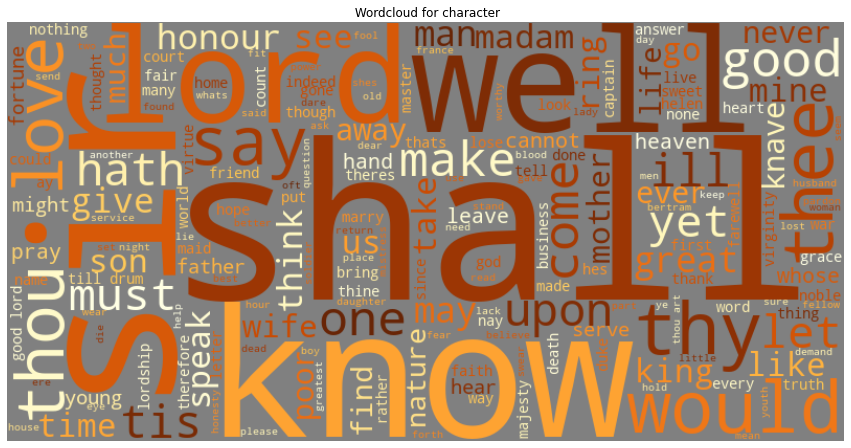

In [14]:
display_wordcloud(attew,'text_cleaned')

#### Each character word counts

In [15]:
# character_wordcount = {}

# for i in attew['character'].unique():

#     character_wordcount[i] = attew[attew['character'] == i]['text_cleaned']

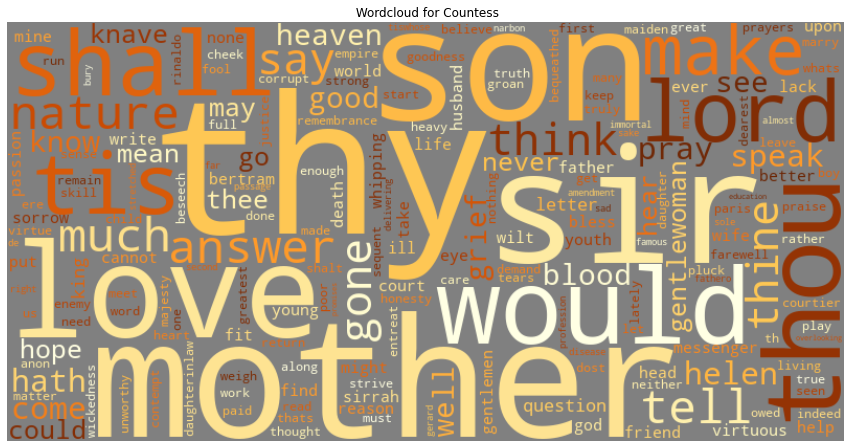

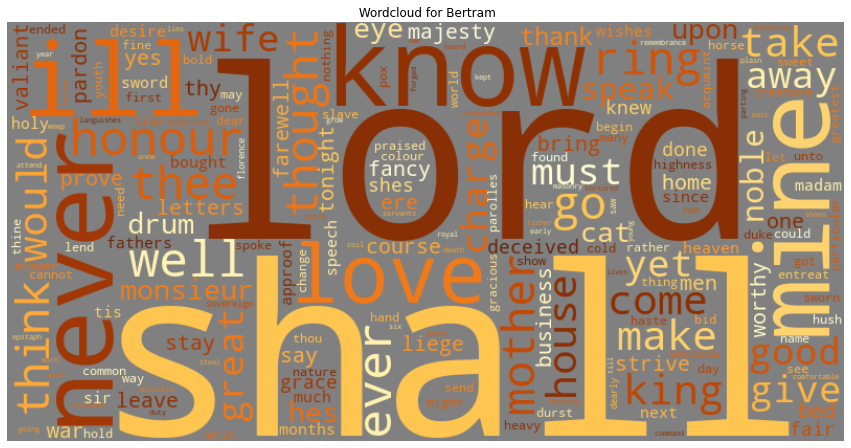

In [16]:
for i in attew['character'].unique()[:2]:

    print
    display_wordcloud(attew[attew['character'] == i],'text_cleaned',i)

In [17]:
lemmatizer = nlp.add_pipe("lemmatizer")

ValueError: [E007] 'lemmatizer' already exists in pipeline. Existing names: ['tok2vec', 'tagger', 'parser', 'senter', 'attribute_ruler', 'lemmatizer', 'ner']